# K-means clustering

## import library

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [229]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

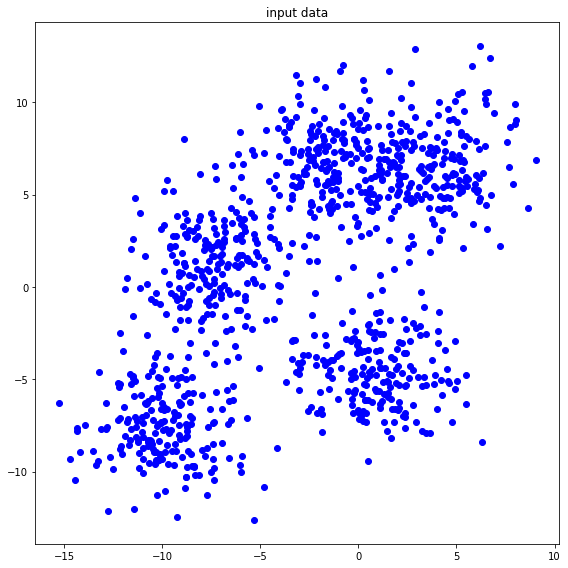

In [230]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [231]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    dif = feature - np.tile(center, reps=(number_data, 1))
    distance = (((dif**2).sum(axis=1))**(1/2)).reshape(-1, 1)    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [232]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    feature_by_label = feature[label_feature.reshape(-1,1)[:,0] == label]
    if feature_by_label.size == 0:
        return np.zeros((1, feature.shape[1]))
    centroid = feature_by_label.sum(axis = 0) / feature_by_label.shape[0]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [233]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cat = []
    for i in range(distance.shape[0]):
        cat.append(np.where(distance[i] == distance[i].min())[0])
    label_feature = np.array(cat)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [234]:
number_cluster          = 2
number_iteration        = 100     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [235]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# label_feature_02[:int(number_data/2)] = np.zeros(int(number_data/2), dtype=int)
# label_feature_02[int(number_data/2):] = np.ones(int((number_data+1)/2), dtype=int)
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_02, label)
        if(np.count_nonzero(label_feature_02 == label) == 0):
            centroid = centroid_iteration_02[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_02 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_02]]
    loss_iteration_02[i] = (1 / number_data) * loss.sum()
    centroid_iteration_02[i] = centroids
    

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [236]:
number_cluster          = 4
number_iteration        = 400     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [237]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_04, label)
        if(np.count_nonzero(label_feature_04 == label) == 0):
            centroid = centroid_iteration_04[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_04 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_04]]
    loss_iteration_04[i] = (1 / number_data) * loss.sum()
    centroid_iteration_04[i] = centroids

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [238]:
number_cluster          = 8
number_iteration        = 800     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [239]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_08, label)
        if(np.count_nonzero(label_feature_08 == label) == 0):
            centroid = centroid_iteration_08[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_08 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_08]]
    loss_iteration_08[i] = (1 / number_data) * loss.sum()
    centroid_iteration_08[i] = centroids

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [240]:
number_cluster          = 16
number_iteration        = 1000     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [241]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    label_distance = []
    label_centroid = []
    for label in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_16, label)
        if(np.count_nonzero(label_feature_16 == label) == 0):
            centroid = centroid_iteration_16[i-1][label]
        distance = compute_distance(feature, centroid)
        label_centroid.append(centroid)
        label_distance.append(distance)
    centroids = np.array(label_centroid)
    distances = np.concatenate(label_distance, axis = 1)
    label_feature_16 = compute_label(distances).reshape(-1,)
    arr = np.arange(number_data)
    loss = distances[[arr], [label_feature_16]]
    loss_iteration_16[i] = (1 / number_data) * loss.sum()
    centroid_iteration_16[i] = centroids

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [242]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [243]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [244]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [245]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [246]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [247]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [248]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [249]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [273]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(centroid_iteration_02[0,:,0], centroid_iteration_02[0,:,1], color = 'blue', label = 'initial')
    plt.scatter(centroid_iteration_02[-1,:,0], centroid_iteration_02[-1,:,1], marker = 's', color = 'red', label = 'final')
    plt.plot(centroid_iteration_02[:,0,0], centroid_iteration_02[:,0,1], color = 'red', label = 'cluster=0')
    plt.plot(centroid_iteration_02[:,1,0], centroid_iteration_02[:,1,1], color = 'blue', label = 'cluster=1')
    plt.legend()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [275]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(centroid_iteration_04[0,:,0], centroid_iteration_04[0,:,1], color = 'blue', label = 'initial')
    plt.scatter(centroid_iteration_04[-1,:,0], centroid_iteration_04[-1,:,1], marker = 's', color = 'red', label = 'final')
    plt.plot(centroid_iteration_04[:,0,0], centroid_iteration_04[:,0,1], color = 'red', label = 'cluster=0')
    plt.plot(centroid_iteration_04[:,1,0], centroid_iteration_04[:,1,1], color = 'blue', label = 'cluster=1')
    plt.plot(centroid_iteration_04[:,2,0], centroid_iteration_04[:,2,1], color = 'coral', label = 'cluster=2')
    plt.plot(centroid_iteration_04[:,3,0], centroid_iteration_04[:,3,1], color = 'chocolate', label = 'cluster=3')
    plt.legend()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [279]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(centroid_iteration_08[0,:,0], centroid_iteration_08[0,:,1], color = 'blue', label = 'initial')
    plt.scatter(centroid_iteration_08[-1,:,0], centroid_iteration_08[-1,:,1], marker = 's', color = 'red', label = 'final')
    plt.plot(centroid_iteration_08[:,0,0], centroid_iteration_08[:,0,1], color = 'red', label = 'cluster=0')
    plt.plot(centroid_iteration_08[:,1,0], centroid_iteration_08[:,1,1], color = 'blue', label = 'cluster=1')
    plt.plot(centroid_iteration_08[:,2,0], centroid_iteration_08[:,2,1], color = 'coral', label = 'cluster=2')
    plt.plot(centroid_iteration_08[:,3,0], centroid_iteration_08[:,3,1], color = 'chocolate', label = 'cluster=3')
    plt.plot(centroid_iteration_08[:,4,0], centroid_iteration_08[:,4,1], color = 'ivory', label = 'cluster=4')
    plt.plot(centroid_iteration_08[:,5,0], centroid_iteration_08[:,5,1], color = 'salmon', label = 'cluster=5')
    plt.plot(centroid_iteration_08[:,6,0], centroid_iteration_08[:,6,1], color = 'sienna', label = 'cluster=6')
    plt.plot(centroid_iteration_08[:,7,0], centroid_iteration_08[:,7,1], color = 'skyblue', label = 'cluster=7')
    plt.legend()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [253]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [254]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [255]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [256]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [257]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0930769025
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8867264896
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1629593397
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.5647677565
**************************************************
## [RESULT 05]
**************************************************


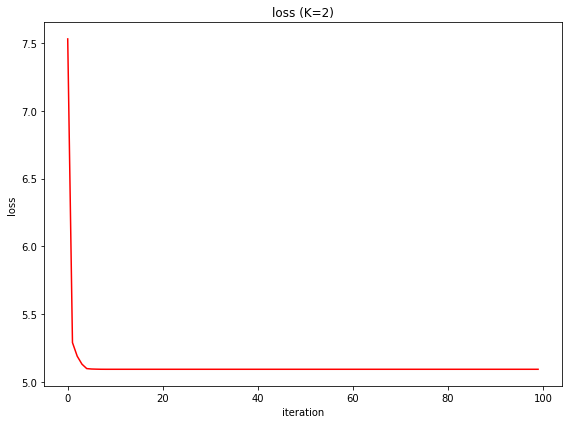

**************************************************
## [RESULT 06]
**************************************************


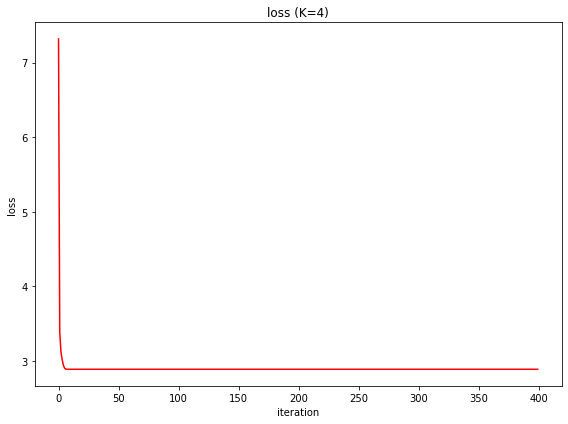

**************************************************
## [RESULT 07]
**************************************************


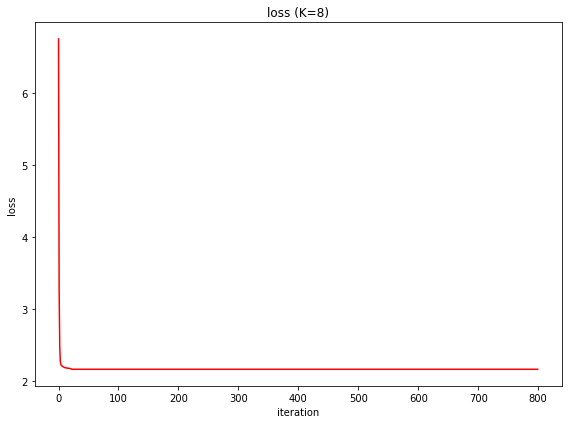

**************************************************
## [RESULT 08]
**************************************************


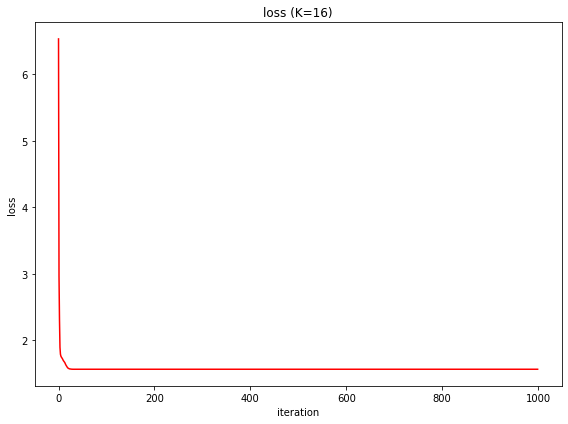

**************************************************
## [RESULT 09]
**************************************************


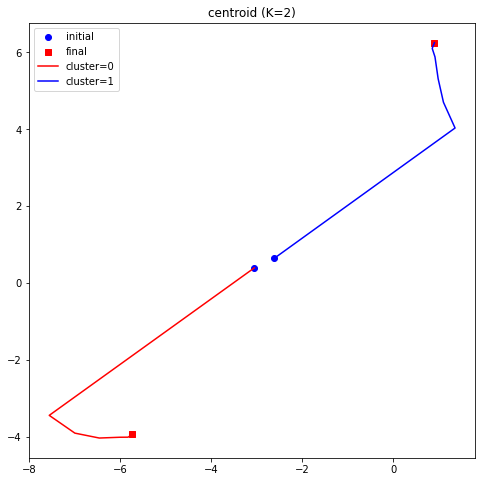

**************************************************
## [RESULT 10]
**************************************************


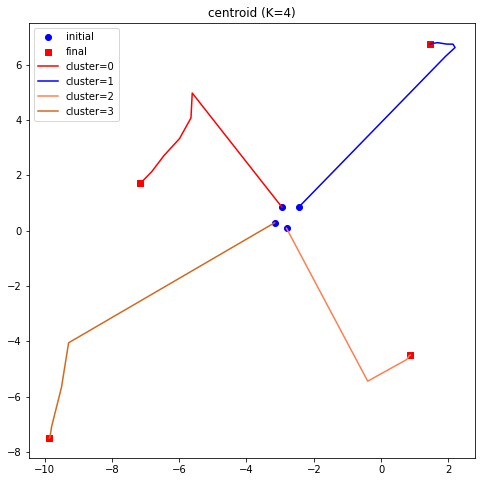

**************************************************
## [RESULT 11]
**************************************************


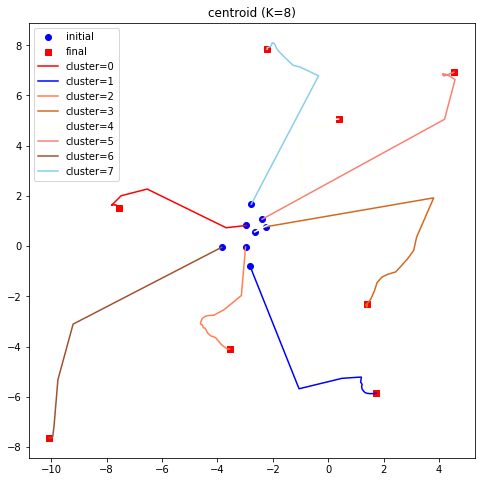

**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


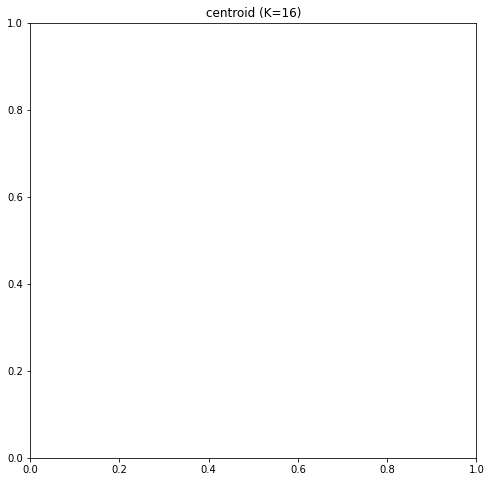

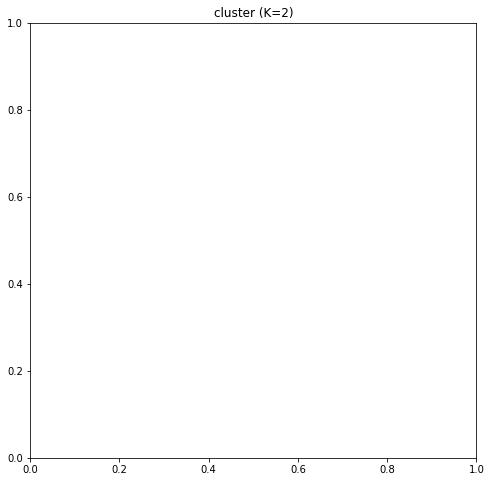

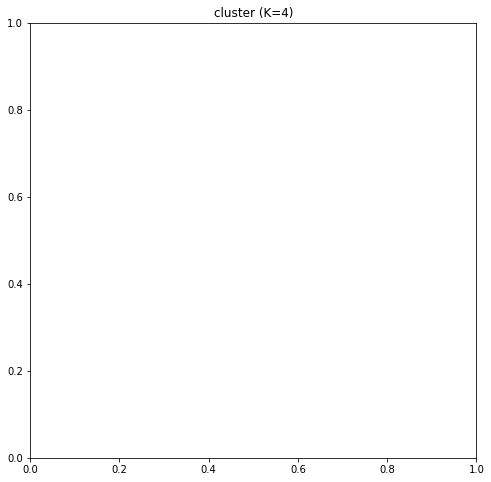

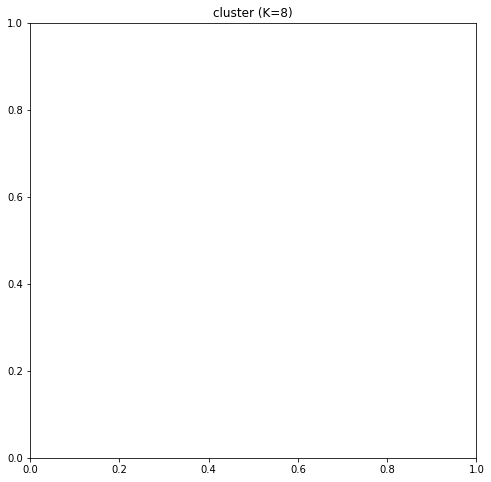

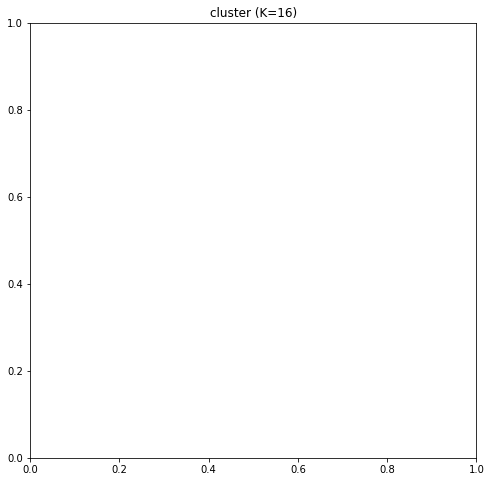

In [280]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)